In [163]:
import numpy as np
import csv

np.set_printoptions(precision=3, suppress=True, linewidth=100)

path = 'espresso.csv'
with open(path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    headers = next(reader)
    data = np.array(list(reader)).astype(float)

print(headers)
print(data[0:3, :]) # first 3 rows


['grind', 'dose', 'target_ratio', 'target_output', 'real_output', 'real_ratio', 'preinfusion', 'brew', 'total_time', 'ratio_diff', 'avg_flow_rate']
[[15.    16.9    1.8   30.42  31.5    1.864 12.    27.    39.     0.036  1.167]
 [15.    17.8    1.8   32.04  31.8    1.787 12.    36.    48.    -0.007  0.883]
 [15.    17.4    1.8   31.32  33.2    1.908 10.    40.    50.     0.06   0.83 ]]


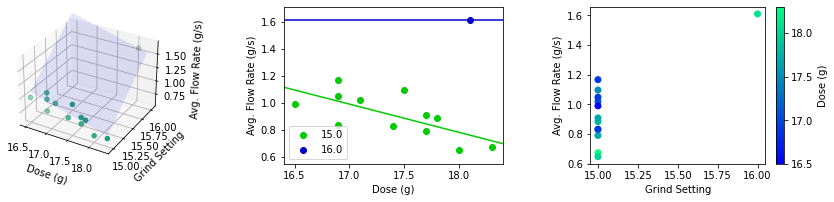

In [164]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


def color_lerp(color0, color1, r, lb, ub):
    c0 = np.asarray(color0)
    c1 = np.asarray(color1)
    lb = lb - 0.001
    ub = ub + 0.001
    return tuple(c0 + (c1 - c0) * (r - lb) / (ub - lb))


color1 = (0, 0.8, 0)
color2 = (0, 0, 0.8)
maxes = np.amax(data, axis=0)
mins = np.amin(data, axis=0)

fig = plt.figure(figsize=plt.figaspect(0.3))

# draw graph of dose, grind size and flow rate
ax0 = fig.add_subplot(1, 3, 1, projection='3d')
im0 = ax0.scatter(data[:, 1], data[:, 0], data[:, 10], c=data[:, 0], cmap='Dark2')

regression = LinearRegression().fit(data[:, [1, 0]], data[:, 10])
x_surf, y_surf = np.meshgrid(np.linspace(
    mins[1], maxes[1]), np.linspace(mins[0], maxes[0]))
z_surf = regression.coef_[0]*x_surf + \
    regression.coef_[1]*y_surf+regression.intercept_
ax0.plot_surface(x_surf, y_surf, z_surf, rstride=1,
                 cstride=1, alpha=0.1, color='b')

ax0.set_xlabel('Dose (g)')
ax0.set_xbound(mins[1] - 0.1, maxes[1] + 0.1)
ax0.set_ylabel('Grind Setting')
ax0.set_ybound(mins[0] - 0.1, maxes[0] + 0.1)
ax0.set_zlabel('Avg. Flow Rate (g/s)')
ax0.set_zbound(mins[10] - 0.1, maxes[10] + 0.1)

# draw graph of dose vs. flow rate
ax1 = fig.add_subplot(1, 3, 2)
grind_settings = np.unique(data[:, 0])
regressions = []
for index, setting in enumerate(grind_settings):
    colour = color_lerp(color1, color2, index, 0, len(grind_settings)-1)
    grind_data = data[data[:, 0] == setting]
    ax1.scatter(grind_data[:, 1], grind_data[:, 10],
                color=colour, label=setting)
    regressions.append(LinearRegression().fit(
        grind_data[:, 1].reshape(-1, 1), grind_data[:, 10]))
    ax1.add_line(plt.Line2D([0, 20], [regressions[index].intercept_,
                 regressions[index].intercept_ + 20 * regressions[index].coef_], color=colour))

ax1.set_xlabel('Dose (g)')
ax1.set_xbound(mins[1] - 0.1, maxes[1] + 0.1)
ax1.set_ylabel('Avg. Flow Rate (g/s)')
ax1.set_ybound(mins[10] - 0.1, maxes[10] + 0.1)
ax1.legend()

# draw graph of grind setting vs. flow rate
ax2 = fig.add_subplot(1, 3, 3)
im2 = ax2.scatter(data[:, 0], data[:, 10], c=data[:, 1], cmap='winter')
cbar2 = fig.colorbar(im2, ax = ax2)

ax2.set_xlabel('Grind Setting')
ax2.set_ylabel('Avg. Flow Rate (g/s)')
cbar2.set_label('Dose (g)')

fig.tight_layout(pad=5.0)
plt.show()
